# Visualize bias in sonsor data
- This script is used to visualize the diurnal mean bias by month between data of 3 sensors installed at MAQS site. 

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'
output_dir = home_path + '0_lcz_mcr/output_analysis/single_point/calibration/'

In [2]:
supersite_data = pd.read_csv(home_path + 'manchester/supersite/hourly_data/final_supersite_merged.csv')
supersite_data['Datetime'] = pd.to_datetime(supersite_data['Datetime'])
supersite_data.rename(columns={'Datetime': 'timestamp'}, inplace=True)
supersite_data

,timestamp,RAIN,FSDS,PBOT,TBOT,RH,WIND
0,2019-07-19 09:00:00,NaN,NaN,NaN,NaN,NaN,0.802263
1,2019-07-19 10:00:00,NaN,NaN,668.369500,9.719147,63.611480,1.116556
2,2019-07-19 11:00:00,NaN,NaN,1001.819760,14.873749,95.265500,1.486398
3,2019-07-19 12:00:00,NaN,NaN,1001.023130,15.554138,94.551660,1.003180
4,2019-07-19 13:00:00,NaN,NaN,1000.406430,17.374878,90.999400,0.956843
...,...,...,...,...,...,...,...
44559,2024-08-31 19:00:00,1.851852e-08,0.576848,1017.874147,16.973687,64.611243,3.264258
44560,2024-08-31 20:00:00,3.032407e-06,0.012817,1018.009075,16.441692,70.207898,2.622588
44561,2024-08-31 21:00:00,0.000000e+00,0.000000,1017.753875,16.075883,74.693912,2.209857
44562,2024-08-31 22:00:00,3.240741e-08,0.043425,1017.671273,15.849163,76.451355,2.070628


In [3]:
sliced_supersite_data = supersite_data[(supersite_data['timestamp'] >= '2022-07-18 15:00:00') & (supersite_data['timestamp'] <= '2024-06-07 20:00:00')]
sliced_supersite_data = sliced_supersite_data[['timestamp', 'TBOT', 'RH']].rename(columns={'TBOT': 'temp_hourly_avg', 'RH': 'rh_hourly_avg'}).set_index('timestamp')
sliced_supersite_data

,temp_hourly_avg,rh_hourly_avg
timestamp,,
2022-07-18 15:00:00,36.353485,15.856182
2022-07-18 16:00:00,36.716064,16.948933
2022-07-18 17:00:00,36.293274,19.232113
2022-07-18 18:00:00,35.510254,20.938822
2022-07-18 19:00:00,33.375946,25.828129
...,...,...
2024-06-07 16:00:00,16.023765,59.349587
2024-06-07 17:00:00,16.678653,58.117922
2024-06-07 18:00:00,15.874307,59.700332


In [6]:
print(sliced_supersite_data['temp_hourly_avg'].min(), 
      sliced_supersite_data['temp_hourly_avg'].max(), 
      sliced_supersite_data['rh_hourly_avg'].min(), 
      sliced_supersite_data['rh_hourly_avg'].max())

-7.297149700000001 38.40674 15.856182 100.0


In [4]:
sliced_supersite_data_datetime = sliced_supersite_data.copy()
sliced_supersite_data_datetime['hour'] = sliced_supersite_data_datetime.index.hour
sliced_supersite_data_datetime['month'] = sliced_supersite_data_datetime.index.month
sliced_supersite_data_datetime

,temp_hourly_avg,rh_hourly_avg,hour,month
timestamp,,,,
2022-07-18 15:00:00,36.353485,15.856182,15,7
2022-07-18 16:00:00,36.716064,16.948933,16,7
2022-07-18 17:00:00,36.293274,19.232113,17,7
2022-07-18 18:00:00,35.510254,20.938822,18,7
2022-07-18 19:00:00,33.375946,25.828129,19,7
...,...,...,...,...
2024-06-07 16:00:00,16.023765,59.349587,16,6
2024-06-07 17:00:00,16.678653,58.117922,17,6
2024-06-07 18:00:00,15.874307,59.700332,18,6


In [5]:
mean_bias_tem = pd.read_csv(output_dir + 'mean_bias_tem.csv')
mean_bias_rh = pd.read_csv(output_dir + 'mean_bias_rh.csv')
bias_data_list = [mean_bias_tem, mean_bias_rh]
#sensor_data_list = [mean_sensor_data_tem, mean_sensor_data_rh]
labelsize = 6
fontsize = 6
boundarywidth = 0.5
labelcolor = '#6b6b6b'
linewidth = 0.5
pad = 1
xwidth = 0.5
length = 4
padding = 5
handletextpad = 0.5
unit_list = ['°C', '%']
order_list = ['(a) ', '(b) ']
title_list = ['$T_{air}$', '$RH$']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lc_list = ['#4a9ee6', '#4ae6d5', '#4ae667', '#b4e64a', '#c34ae6', '#e64a9e', '#911b1b', '#e66f4a', '#e6a64a', '#e6dd4a', '#4a67e6', '#4e4ae6']

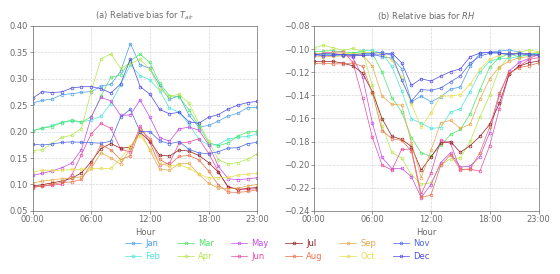

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(5.5, 2.5))
   
ax = axes.flatten()

for i in range(2):
    for m in range(12):
        bias_monthly_data = bias_data_list[i][bias_data_list[i]['month'] == m+1]
        #sensor_monthly_data = sensor_data_list[i][sensor_data_list[i]['month'] == m+1]
        sensor_monthly_data = sliced_supersite_data_datetime[sliced_supersite_data_datetime['month'] == m+1]
        var_name = ['temp_hourly_avg', 'rh_hourly_avg'][i]
        std_bias = bias_monthly_data.groupby('hour')['mean_bias'].mean() / sensor_monthly_data.groupby('hour')[var_name].mean()
        ax[i].plot(std_bias, linewidth=linewidth, label=month_names[m], color = lc_list[m], marker='o', markersize=2, markerfacecolor='none', markeredgewidth=linewidth)
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)
    #ax[i].set_ylabel(unit_list[i], labelpad=5, rotation=0, ha='center', fontsize=labelsize,color=labelcolor)
    #ax[i].yaxis.set_label_coords(0, 1.025) 
    ax[i].set_title(order_list[i] + 'Relative bias for '+title_list[i], fontsize=fontsize, color=labelcolor, pad=padding) 
    ax[i].set_xticks([0, 6, 12, 18, 23])
    ax[i].set_xticklabels(['00:00', '06:00', '12:00', '18:00', '23:00'])
    ax[i].set_xlim(0, 23)
    ax[i].tick_params(axis='both', labelsize=labelsize, length=2, pad =0.1, width = boundarywidth)
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color=labelcolor, labelcolor=labelcolor, labelsize=fontsize, pad=pad, width=xwidth, length=length/2)
    ax[i].tick_params(axis='x', which='both', left=True, right=False, labelleft=True, color=labelcolor, 
                                  labelcolor=labelcolor, labelsize=fontsize, pad=pad, width=xwidth, length=length/2, rotation=0)
    ax[i].grid(True, which='both', axis='both',linestyle='--',linewidth=0.5, alpha=0.5)  
    ax[i].set_xlabel('Hour', fontsize=fontsize, color=labelcolor, labelpad=padding/2)
ax[0].set_ylim(0.05, 0.4)
ax[1].set_ylim(-0.24, -0.08)  

line, label = ax[0].get_legend_handles_labels()  
legend = fig.legend(line, label, bbox_to_anchor=(0.5, -0.029), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=fontsize, ncol=6)
for t, text in enumerate(legend.get_texts()):
        text.set_color(lc_list[t])
plt.subplots_adjust(left=0.055, right=0.975, bottom=0.2, top=0.94, wspace=0.25, hspace= 0.5)  
fig.savefig(output_dir + 'bias.png', dpi=300)    
fig.savefig(output_dir + 'bias.pdf', dpi=600)   

In [11]:
sliced_supersite_data_datetime

,temp_hourly_avg,rh_hourly_avg,hour,month
timestamp,,,,
2022-07-18 15:00:00,36.353485,15.856182,15,7
2022-07-18 16:00:00,36.716064,16.948933,16,7
2022-07-18 17:00:00,36.293274,19.232113,17,7
2022-07-18 18:00:00,35.510254,20.938822,18,7
2022-07-18 19:00:00,33.375946,25.828129,19,7
...,...,...,...,...
2024-06-07 16:00:00,16.023765,59.349587,16,6
2024-06-07 17:00:00,16.678653,58.117922,17,6
2024-06-07 18:00:00,15.874307,59.700332,18,6


In [30]:
bias

,rh_hourly_avg,temp_hourly_avg
timestamp,,
2022-07-18 15:00:00,-0.648849,1.486682
2022-07-18 16:00:00,-2.122822,2.950603
2022-07-18 17:00:00,-3.147780,3.867893
2022-07-18 18:00:00,-3.108322,3.274246
2022-07-18 19:00:00,-3.804629,3.118387
...,...,...
2024-06-07 16:00:00,-9.434087,2.524402
2024-06-07 17:00:00,-13.490922,4.066180
2024-06-07 18:00:00,-9.674832,2.524527
